In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('/content/drive/MyDrive/PhD/wordlist_classlawiki_sr_20240122114347.csv')

# Convert 'word' column to string to ensure compatibility with regex
df['word'] = df['word'].astype(str)

df

,word,freq
0,.,6438580
1,",",5916591
2,biti,5835707
3,u,4289454
4,i,2848044
...,...,...
345260,"0,024",5
345261,#43,5
345262,#42,5
345263,#154,5


In [22]:
# Character mapping from Cyrillic to Latin
cyrillic_to_latin = {
    'а': 'a', 'б': 'b', 'в': 'v', 'г': 'g', 'д': 'd',
    'ђ': 'đ', 'е': 'e', 'ж': 'ž', 'з': 'z', 'и': 'i',
    'ј': 'j', 'к': 'k', 'л': 'l', 'љ': 'lj', 'м': 'm',
    'н': 'n', 'њ': 'nj', 'о': 'o', 'п': 'p', 'р': 'r',
    'с': 's', 'т': 't', 'ћ': 'ć', 'у': 'u', 'ф': 'f',
    'х': 'h', 'ц': 'c', 'ч': 'č', 'џ': 'dž', 'ш': 'š',
    'А': 'A', 'Б': 'B', 'В': 'V', 'Г': 'G', 'Д': 'D',
    'Ђ': 'Đ', 'Е': 'E', 'Ж': 'Ž', 'З': 'Z', 'И': 'I',
    'Ј': 'J', 'К': 'K', 'Л': 'L', 'Љ': 'Lj', 'М': 'M',
    'Н': 'N', 'Њ': 'Nj', 'О': 'O', 'П': 'P', 'Р': 'R',
    'С': 'S', 'Т': 'T', 'Ћ': 'Ć', 'У': 'U', 'Ф': 'F',
    'Х': 'H', 'Ц': 'C', 'Ч': 'Č', 'Џ': 'Dž', 'Ш': 'Š'
}

# Function to convert Cyrillic to Latin only if the text contains Cyrillic characters
def convert_cyrillic_to_latin(text):
    # Check if the text contains any Cyrillic characters
    if any('а' <= char <= 'я' or 'А' <= char <= 'Я' for char in text):
        return ''.join(cyrillic_to_latin.get(char, char) for char in text)
    return text  # Return the text unchanged if no Cyrillic characters are found

# Apply the conversion function to the 'word' column
df['word'] = df['word'].apply(convert_cyrillic_to_latin)

df

,word,freq
0,.,6438580
1,",",5916591
2,biti,5835707
3,u,4289454
4,i,2848044
...,...,...
345260,"0,024",5
345261,#43,5
345262,#42,5
345263,#154,5


In [23]:
# Filter out rows where 'word' contains only punctuation or starts with '#'
df = df[~df['word'].str.match(r'^[.,#\W].*')]

df = df.drop_duplicates(subset='word')

df

,word,freq
2,biti,5835707
3,u,4289454
4,i,2848044
8,na,1602609
9,sebe,1544095
...,...,...
345256,"1,77.",5
345257,"0,038",5
345258,"0,036",5
345259,"0,032",5


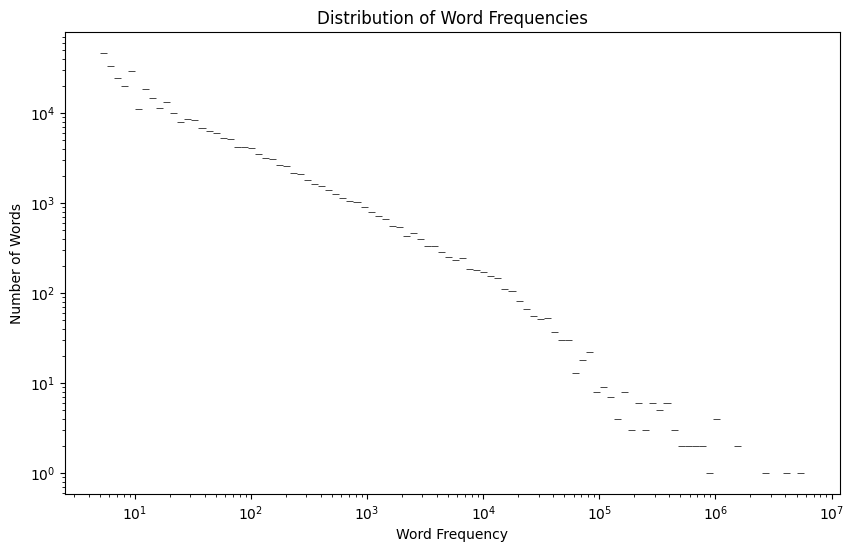

In [24]:
# Plot histogram of word frequencies
plt.figure(figsize=(10, 6))
sns.histplot(df['freq'], bins=100, log_scale=(True, True))  # Log scale to handle large range in freq values
plt.xlabel('Word Frequency')
plt.ylabel('Number of Words')
plt.title('Distribution of Word Frequencies')
plt.show()


In [25]:
# Save the DataFrame to a CSV file
df.to_csv('/content/drive/MyDrive/PhD/wordlist_classlawiki_sr_cleaned.csv', index=False)  # Set index=False to avoid saving the index column